## This code is to find out the different of each epoch and batch size combination

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [3]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path = parent_path / 'Data/googlenet/fashion_mnist/'
print('The data path is:', data_path)

The current path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/code
The parent path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist


### extract data

In [4]:
batch_sizes = [64]
epochs = [10]
rounds = 1

#### read all the data from all the folders

In [5]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder_names = os.listdir(data_path)
print('The folder names are:', folder_names)
print('The folder list is:', folder_list)

# find the common folders
common_folders = list(set(folder_list).intersection(folder_names))
# sort the common folders
common_folders.sort()
print('The common folders are:', common_folders)
print(len(common_folders))

The folder names are: ['E10_B64_R0']
The folder list is: ['E10_B64_R0']
The common folders are: ['E10_B64_R0']
1


### analysis data

#### find the data in same epoch and batch size

In [6]:
# read the data from the common folders
datafolder = data_path / common_folders[0]
print('The data folder is:', datafolder)
# find the files in the data folder
files = os.listdir(datafolder)
print('The files are:', files)


The data folder is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist/E10_B64_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']


In [7]:
# read all the files in the common folders
LayersTime = np.load(datafolder / 'Layers_time.npy', allow_pickle=True)
TrainPartTime = np.load(datafolder / 'Train_part_time.npy', allow_pickle=True)
EpochTime = np.load(datafolder / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy = np.load(datafolder / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc = np.load(datafolder / 'Train_acc.npy', allow_pickle=True)
TestAcc = np.load(datafolder / 'Test_acc.npy', allow_pickle=True)

In [8]:
# print('The layers time is:', LayersTime)
# print('The train part time is:', TrainPartTime)
# print('The epoch time is:', EpochTime)
# print('The epoch energy is:', EpochEnergy)
# print('The train accuracy is:', TrainAcc)
# print('The test accuracy is:', TestAcc)

#### LayersTime

In [9]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


In [10]:
# print('The shape of LayersTime is:', LayersTime.shape)
# print(LayersTime)

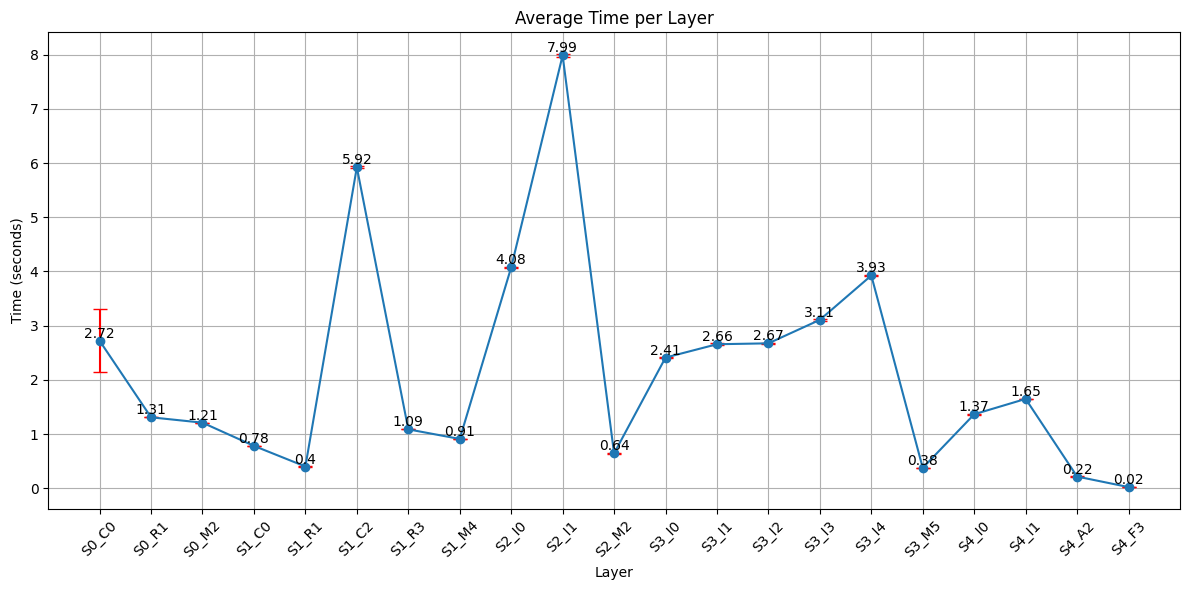

In [11]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime, axis=1)
layer_stds = np.std(LayersTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [12]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [13]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[4.06496286 4.07973409 4.07217002 4.07273626 4.07707071 4.08540487
  4.07375884 4.0793891  4.07558107 4.07958603]
 [7.9089303  7.99364281 7.99432945 7.99651742 8.00013328 7.99416327
  7.99370885 7.99390221 7.99715447 7.98484659]
 [2.42248869 2.40777683 2.40499091 2.40846324 2.40653992 2.40501738
  2.41321683 2.41601992 2.41509414 2.42250204]
 [2.60663366 2.65936303 2.6668787  2.66161728 2.6673708  2.6695323
  2.66856861 2.66517448 2.66233516 2.65546465]
 [2.64783239 2.67725158 2.673244   2.67911744 2.6724472  2.67840147
  2.67805934 2.6776073  2.68388605 2.68054986]
 [3.07211018 3.10689187 3.11890078 3.11035228 3.11716366 3.11876583
  3.11472559 3.11335564 3.10793114 3.10260892]
 [3.89521289 3.92497277 3.92502046 3.92808628 3.92488742 3.92794299
  3.92886972 3.93097234 3.93754292 3.93772101]
 [1.34877539 1.36649299 1.37232757 1.36480427 1.36837125 1.36870646
  1.36814451 1.36968398 1.3712821  1.36693478]
 [1.63679266 1.64864707 1.64905453 1.65592551 1.65471005 1.

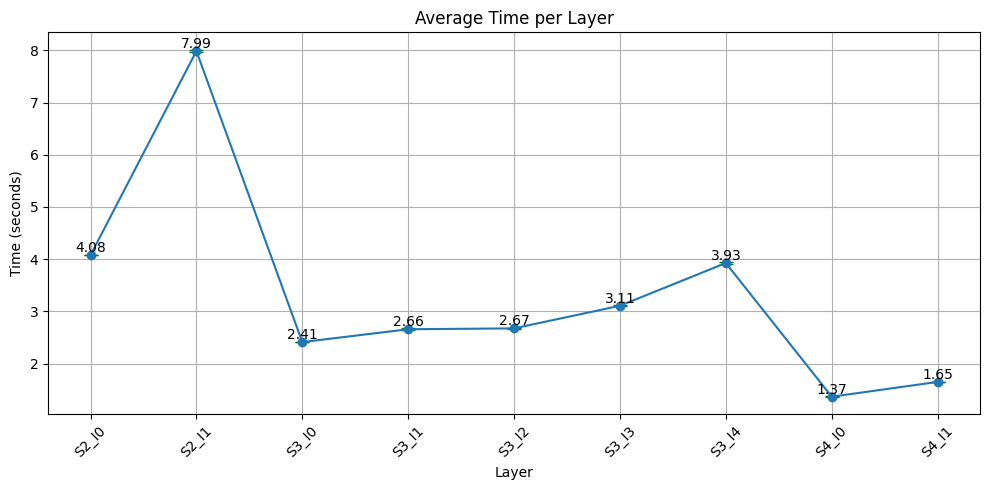

In [17]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [15]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

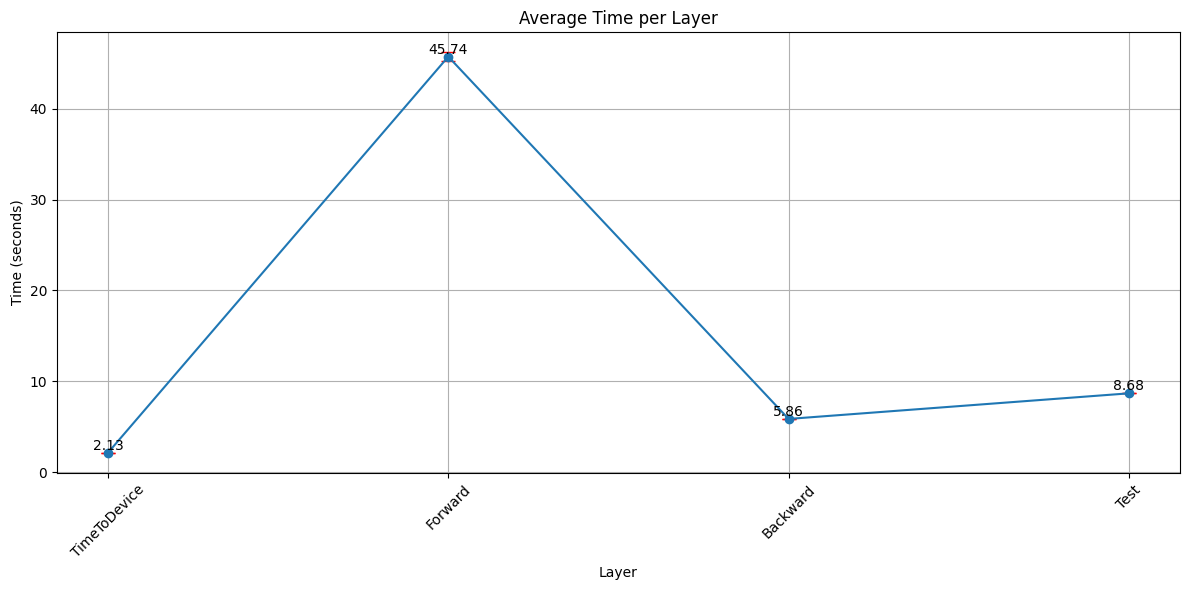

In [18]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime, axis=1)
trainpart_stds = np.std(TrainPartTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()